# Space Titanic

# Load the dataset

In [1]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
df = pd.read_csv('Data/train.csv')

In [3]:
# View the df
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
df.shape

(8693, 14)

# Data Preparation

In [5]:
# Check for nulls
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
# Fill nulls in age feature with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df['Age'].mean())
mean_age = df['Age'].mean()

28.827930467465347


The features RoomService, FoodCourt, ShoppingMall, Spa, & VRDeck are amounts spent at each of the SpaceSHip Titanic's luxury amenities. Any nulls in these features will be replaced with 0s. Nulls for VIP & CryoSleep will be assumed to be False.

In [7]:
# Replace NAs
df['RoomService'] = df['RoomService'].fillna(0)
df['FoodCourt'] = df['FoodCourt'].fillna(0)
df['ShoppingMall'] = df['ShoppingMall'].fillna(0)
df['Spa'] = df['Spa'].fillna(0)
df['VRDeck'] = df['VRDeck'].fillna(0)
df['VIP'] = df['VIP'].fillna(False)
df['CryoSleep'] = df['CryoSleep'].fillna(False)

Features will be created from 'Cabin'. These features will describe the deck level and side of the ship.

In [8]:
# Extract the deck information
df['Deck'] = df['Cabin'].str[:1]

# Extract the side (port/starboard) information
df['Side'] = df['Cabin'].str[-1:]

In [9]:
# Drop the cabin feature
df = df.drop(['Cabin'], axis=1)

Recode binary features as numeric

In [10]:
df.replace({False: 0, True: 1, 'False':0}, inplace=True)

Create Room Occupants Feature from PassengerId. This feature gives the total number of occupants in the room with each passenger.

In [11]:
# Obtain GroupId
df['GroupId'] = df['PassengerId'].str[:4]

In [12]:
# Extract counts by GroupID
df_counts = pd.DataFrame(df['GroupId'].value_counts())
df_counts.reset_index(inplace=True)
df_counts = df_counts.rename(columns = {'index':'GroupId', 'GroupId':'Total Room Occupants'})
df_counts['GroupId'] = df_counts['GroupId'].astype(object)

In [13]:
# Merge Total Room Occupants data with df
df = df.merge(df_counts, on='GroupId', how='left')

# Drop unneeded features
df = df.drop(['PassengerId', 'GroupId', 'Name'], axis=1)

Dummy variable will then be created for categorical data

In [14]:
df = pd.get_dummies(df)

Validate no nulls

In [15]:
# Check for nulls
df.isnull().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Total Room Occupants         0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
dtype: int64

# Data Exploration

In [16]:
# View the correlations
df.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total Room Occupants,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
CryoSleep,1.000000,-0.070736,-0.078281,-0.244089,-0.205928,-0.207798,-0.198307,-0.192721,0.460132,0.079363,...,-0.030594,0.124049,0.028433,-0.066678,-0.110644,-0.220150,0.241399,-0.017579,-0.023858,0.016861
Age,-0.070736,1.000000,0.091574,0.068425,0.127343,0.032846,0.121071,0.099551,-0.074249,-0.176833,...,0.074245,0.103166,0.126428,0.077091,0.028312,-0.018762,-0.209792,0.013673,-0.011758,0.010749
VIP,-0.078281,0.091574,1.000000,0.056566,0.125499,0.018412,0.060991,0.123061,-0.037261,0.002856,...,0.132574,0.065080,0.065591,0.067678,-0.012912,-0.057578,-0.098863,-0.003672,0.008798,-0.011017
RoomService,-0.244089,0.068425,0.056566,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124,-0.039734,...,-0.022937,-0.064536,-0.019494,0.160699,0.043935,0.085627,-0.145289,0.007525,0.006991,-0.014918
FoodCourt,-0.205928,0.127343,0.125499,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583,0.032502,...,0.119327,0.155351,0.257511,0.020128,-0.038889,-0.131988,-0.149911,0.014267,-0.019682,0.019625
ShoppingMall,-0.207798,0.032846,0.018412,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391,-0.038536,...,-0.017335,-0.010750,0.000906,0.054823,0.031747,0.074473,-0.108538,-0.006787,0.020940,-0.018018
Spa,-0.198307,0.121071,0.060991,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545,0.019218,...,0.060152,0.114257,0.163670,0.033486,-0.011736,-0.087538,-0.124342,0.036316,-0.005700,-0.002116
VRDeck,-0.192721,0.099551,0.123061,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874,0.009130,...,0.096177,0.122644,0.206639,-0.003542,-0.017905,-0.094548,-0.127434,0.012369,0.009089,-0.006950
Transported,0.460132,-0.074249,-0.037261,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000,0.082644,...,-0.002623,0.144733,0.108193,-0.034046,-0.097965,-0.087753,0.016269,-0.014568,-0.101397,0.101455
Total Room Occupants,0.079363,-0.176833,0.002856,-0.039734,0.032502,-0.038536,0.019218,0.009130,0.082644,1.000000,...,0.038748,0.079807,0.104512,-0.005688,-0.064911,-0.124731,0.039220,-0.015563,-0.017522,0.011615


In [17]:
# View the distribution of Transported
df['Transported'].value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

The dataset is fairly balanced

# Building the model - Logistic Regression

In [18]:
# Build training and test datasets
x = df.drop(['Transported'], axis=1)
y = df['Transported']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=711)

In [19]:
# Load libraries
from sklearn.linear_model import LogisticRegression

In [20]:
# Setup an instance of the model
model = LogisticRegression(max_iter=10000)

In [21]:
# Fit the model
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

# Evaluating the model - Logistic Regression

In [22]:
# Load libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [23]:
# Build predictions
predictions = model.predict(x_test)

In [24]:
# Calculate accuracy score
accuracy_score(y_test, predictions)

0.7941345600920069

[Text(0, 0.5, 'Safe'), Text(0, 1.5, 'Transported')]

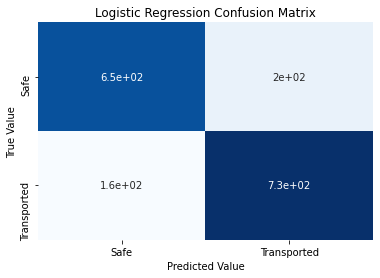

In [25]:
# Build a confusion matrix of the results
matrix = confusion_matrix(y_test, predictions)

# Create pandas df
cm_df = pd.DataFrame(matrix)

# Create heatmap
ax= plt.subplot()
sns.heatmap(cm_df, annot=True, cbar=None, cmap="Blues", ax=ax)
ax.set_title("Logistic Regression Confusion Matrix")
ax.set_ylabel("True Value"), ax.set_xlabel("Predicted Value")
ax.xaxis.set_ticklabels(['Safe', 'Transported']); ax.yaxis.set_ticklabels(['Safe', 'Transported'])

Overall the model was 79.4% accurate

# Building the model - Random Forest

In [26]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Setup an instance of the model
rf = RandomForestClassifier(n_estimators=10000, random_state=711, n_jobs = -1)

In [28]:
# Train the model
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=711)

# Evaluating the model - Random Forest

In [29]:
# Build predictions
predictions_rf = rf.predict(x_test)

In [30]:
# Calculate accuracy score
accuracy_score(y_test, predictions_rf)

0.7849338700402531

[Text(0, 0.5, 'Safe'), Text(0, 1.5, 'Transported')]

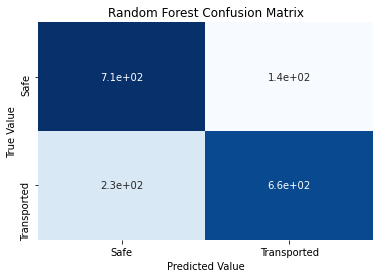

In [31]:
# Build a confusion matrix of the results
matrix_rf = confusion_matrix(y_test, predictions_rf)

# Create pandas df
cm_df_rf = pd.DataFrame(matrix_rf)

# Create heatmap
ax= plt.subplot()
sns.heatmap(cm_df_rf, annot=True, cbar=None, cmap="Blues", ax=ax)
ax.set_title("Random Forest Confusion Matrix")
ax.set_ylabel("True Value"), ax.set_xlabel("Predicted Value")
ax.xaxis.set_ticklabels(['Safe', 'Transported']); ax.yaxis.set_ticklabels(['Safe', 'Transported'])

Overall the random forest model was 78.5% accurate.

# Building the Model - XGBoost

In [32]:
# Load libraries
from xgboost import XGBClassifier

In [33]:
# Setup an instance of the model
xgboost = XGBClassifier()

In [34]:
# Train the model
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

# Evaluating the model - XGBoost

In [35]:
# Build predictions
predictions_xg = xgboost.predict(x_test)

In [36]:
# Calculate accuracy score
accuracy_score(y_test, predictions_xg)

0.780333525014376

[Text(0, 0.5, 'Safe'), Text(0, 1.5, 'Transported')]

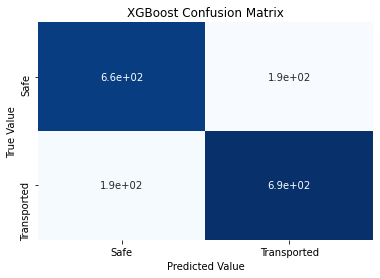

In [37]:
# Build a confusion matrix of the results
matrix_rf = confusion_matrix(y_test, predictions_xg)

# Create pandas df
cm_df_rf = pd.DataFrame(matrix_rf)

# Create heatmap
ax= plt.subplot()
sns.heatmap(cm_df_rf, annot=True, cbar=None, cmap="Blues", ax=ax)
ax.set_title("XGBoost Confusion Matrix")
ax.set_ylabel("True Value"), ax.set_xlabel("Predicted Value")
ax.xaxis.set_ticklabels(['Safe', 'Transported']); ax.yaxis.set_ticklabels(['Safe', 'Transported'])

In [38]:
pd.DataFrame(xgboost.feature_importances_.reshape(1,-1), columns=x_train.columns)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total Room Occupants,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0.53914,0.009614,0.012023,0.016488,0.015436,0.012274,0.01696,0.019457,0.005809,0.127726,...,0.006849,0.009496,0.016798,0.006293,0.030463,0.012651,0.019519,0.0,0.01082,0.016227


# Combining the models

In [39]:
# Create average prediction
average_pred = (predictions_xg + predictions_rf + predictions) / 3

In [40]:
# Round to nearest int
average_pred = [round(num) for num in average_pred]

In [41]:
# Calculate accuracy score
accuracy_score(y_test, average_pred)

0.7987349051178838

The average is 79.9% accurate, an increase of .6% from the best model

[Text(0, 0.5, 'Safe'), Text(0, 1.5, 'Transported')]

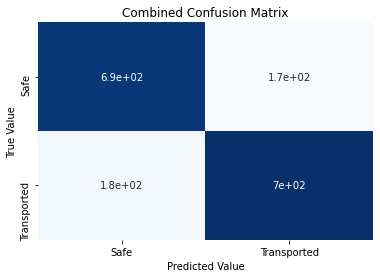

In [42]:
# Build a confusion matrix of the results
matrix_rf = confusion_matrix(y_test, average_pred)

# Create pandas df
cm_df_rf = pd.DataFrame(matrix_rf)

# Create heatmap
ax= plt.subplot()
sns.heatmap(cm_df_rf, annot=True, cbar=None, cmap="Blues", ax=ax)
ax.set_title("Combined Confusion Matrix")
ax.set_ylabel("True Value"), ax.set_xlabel("Predicted Value")
ax.xaxis.set_ticklabels(['Safe', 'Transported']); ax.yaxis.set_ticklabels(['Safe', 'Transported'])

# Build test dataset predictions

In [77]:
# Load datasets
test_df = pd.read_csv('Data/test.csv')

In [78]:
# View the dataframe
test_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [79]:
# Extract PassengerIDs
PassengerId = test_df['PassengerId']

In [61]:
# Fill nulls in age feature with mean
test_df['Age'] = test_df['Age'].fillna(mean_age)

In [62]:
# Replace NAs
test_df['RoomService'] = test_df['RoomService'].fillna(0)
test_df['FoodCourt'] = test_df['FoodCourt'].fillna(0)
test_df['ShoppingMall'] = test_df['ShoppingMall'].fillna(0)
test_df['Spa'] = test_df['Spa'].fillna(0)
test_df['VRDeck'] = test_df['VRDeck'].fillna(0)
test_df['VIP'] = test_df['VIP'].fillna(False)
test_df['CryoSleep'] = test_df['CryoSleep'].fillna(False)

In [63]:
# Extract the deck information
test_df['Deck'] = test_df['Cabin'].str[:1]

# Extract the side (port/starboard) information
test_df['Side'] = test_df['Cabin'].str[-1:]

In [64]:
# Drop the cabin feature
test_df = test_df.drop(['Cabin'], axis=1)

In [65]:
# Recode True/False
test_df.replace({False: 0, True: 1, 'False':0}, inplace=True)

In [66]:
# Obtain GroupId
test_df['GroupId'] = test_df['PassengerId'].str[:4]

In [67]:
# Extract counts by GroupID
test_df_counts = pd.DataFrame(test_df['GroupId'].value_counts())
test_df_counts.reset_index(inplace=True)
test_df_counts = test_df_counts.rename(columns = {'index':'GroupId', 'GroupId':'Total Room Occupants'})
test_df_counts['GroupId'] = test_df_counts['GroupId'].astype(object)

In [68]:
# Merge Total Room Occupants data with df
test_df = test_df.merge(test_df_counts, on='GroupId', how='left')

Note: No group ids exist in both the test and training datasets.

In [69]:
# Drop unneeded features
test_df = test_df.drop(['PassengerId', 'GroupId', 'Name'], axis=1)

In [70]:
# Get dummy variables
test_df = pd.get_dummies(test_df)

In [71]:
# Check for nulls
df.isnull().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Total Room Occupants         0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
dtype: int64

In [72]:
# Build logistic regression predictions
test_lr_pred = model.predict(test_df)

In [74]:
# Build random forest predictions
test_rf_pred = rf.predict(test_df)

In [75]:
# Build xgboost predictions
test_xg_pred = xgboost.predict(test_df)

In [100]:
# Create average prediction
test_ave_pred = (test_lr_pred + test_rf_pred + test_xg_pred) / 3

# Round to nearest int
test_ave_pred = [round(num) for num in test_ave_pred]

# Save predictions

In [96]:
# Build Logistic Regression Dataframe
lr_df = pd.DataFrame(columns=['PassengerId', 'Transported'])

# Set Transported
lr_df['Transported'] = test_lr_pred

# Set PassengerID
lr_df['PassengerId'] = PassengerId

# Recode results
lr_df.replace({0: False, 1: True}, inplace=True)

# Save to csv
lr_df.to_csv('Predictions/logistic_regression.csv', index=False)

In [97]:
# Build Random Forest Dataframe
rf_df = pd.DataFrame(columns=['PassengerId', 'Transported'])

# Set Transported
rf_df['Transported'] = test_rf_pred

# Set PassengerID
rf_df['PassengerId'] = PassengerId

# Recode results
rf_df.replace({0: False, 1: True}, inplace=True)

# Save to csv
rf_df.to_csv('Predictions/random_forest.csv', index=False)

In [98]:
# Build XGBoost Dataframe
xg_df = pd.DataFrame(columns=['PassengerId', 'Transported'])

# Set Transported
xg_df['Transported'] = test_xg_pred

# Set PassengerID
xg_df['PassengerId'] = PassengerId

# Recode results
xg_df.replace({0: False, 1: True}, inplace=True)

# Save to csv
xg_df.to_csv('Predictions/xgboost.csv', index=False)

In [101]:
# Build Combined Dataframe
c_df = pd.DataFrame(columns=['PassengerId', 'Transported'])

# Set Transported
c_df['Transported'] = test_ave_pred

# Set PassengerID
c_df['PassengerId'] = PassengerId

# Recode results
c_df.replace({0: False, 1: True}, inplace=True)

# Save to csv
c_df.to_csv('Predictions/combined.csv', index=False)